# Tutorial Notebook

## 0. Setup and load data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import fasttreeshap
import matplotlib.pyplot as plt
import pandas as pd
import shap

from src.utils import _eval_pred, _fit_pipeline, _get_X_y_idx, _set_train_test

In [4]:
y_label = "cardio"
input_pickle_fp = "data/cardio_train_clean.pkl"
id_col = "id"
trainer = ("xgb", "classifier")
n_features = 5
n_trials = 100

In [5]:
df = pd.read_pickle(input_pickle_fp).head(1000)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1381,19640,2,167,64.0,110,70,1,1,0,0,0,0
996,1383,18951,1,168,78.0,120,80,1,1,0,0,1,1
997,1385,18751,1,149,56.0,140,80,1,1,0,0,1,1
998,1386,17371,1,156,74.0,150,90,1,1,0,0,0,1


## 1. ML pipeline execution

In [10]:
X, y, idx = _get_X_y_idx(df=df, id_col=id_col, y_label=y_label, trainer=trainer)

input data shape: (1000, 12)
input outcome shape: (1000, 1)


In [11]:
X_train, X_test, y_train, y_test, _, idx_test = _set_train_test(trainer, X, y, idx)

In [12]:
fitted_pipeline = _fit_pipeline(
    X_train=X_train,
    y_train=y_train,
    trainer=trainer,
    fname=f"{trainer[0]}_{trainer[1]}__{y_label}",
    n_features=n_features,
    n_trials=n_trials,
)

[I 2025-04-14 00:57:30,255] A new study created in memory with name: feature_selection


measure_of_accuracy = f1_score(y_true, y_pred, average='macro')

pre-SHAP init:
- X_train.shape:(800, 12)
- y_train.shape(800, 1)


[I 2025-04-14 00:57:30,440] Trial 0 finished with value: 0.6375230743413325 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.13103143857073918, 'max_bin': 18, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 101, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 17.485604649374103}. Best is trial 0 with value: 0.6375230743413325.
[I 2025-04-14 00:57:30,897] Trial 1 finished with value: 0.6484110885733605 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.21295346204423066, 'max_bin': 17, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 160, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 5, 'reg_lambda': 5, 'scale_pos_weight': 12.890009117909408}. Best is trial 1 with value: 0.6484110885733605.
[I 2025-04-14 00:57:31,138] Trial 2 finished with value: 0.5538765965101637 and parameters: {'objective': 'binary:logistic', 'eval_

pre-SHAP done - 1.4191319942474365 seconds

SHAP init:
- X_train.shape:(800, 12)
- y_train.shape(800, 1)


[I 2025-04-14 00:57:42,770] A new study created in memory with name: LohrasbOptimizer_xgb_classifier


SHAP done - 11.076321840286255 seconds


[I 2025-04-14 00:57:43,174] Trial 0 finished with value: 0.5538765965101637 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.13103143857073918, 'max_bin': 18, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 101, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 17.485604649374103}. Best is trial 0 with value: 0.5538765965101637.
[I 2025-04-14 00:57:43,774] Trial 1 finished with value: 0.4280193236714976 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.21295346204423066, 'max_bin': 17, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 160, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 5, 'reg_lambda': 5, 'scale_pos_weight': 12.890009117909408}. Best is trial 0 with value: 0.5538765965101637.
[I 2025-04-14 00:57:44,111] Trial 2 finished with value: 0.45080091533180777 and parameters: {'objective': 'binary:logistic', 'eval

######################################
- final_pipeline__xgb_classifier__cardio.joblib saved.
######################################


In [14]:
y_pred, acc = _eval_pred(pip=fitted_pipeline, trainer=trainer, X=X_test, y=y_test)

F1 score : 0.43565206723101463
Classification report : 
              precision    recall  f1-score   support

           0       0.73      0.11      0.19        99
           1       0.52      0.96      0.68       101

    accuracy                           0.54       200
   macro avg       0.63      0.54      0.44       200
weighted avg       0.63      0.54      0.44       200

Confusion matrix : 
[[11 88]
 [ 4 97]]


## 2. SHAP explanation of best estimator

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


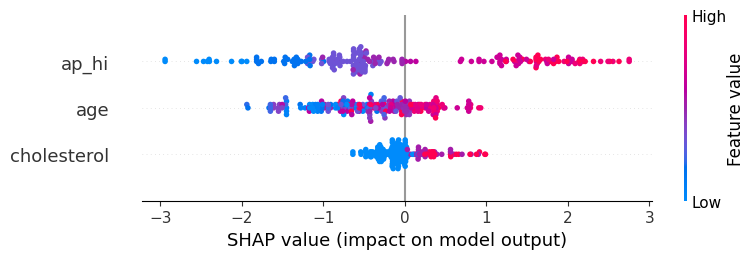

<Figure size 640x480 with 0 Axes>

In [23]:
plt.cla()
plt.clf()
fig = plt.gcf()

scaled_X_test = fitted_pipeline[:-1].transform(X_test)
estimator = fitted_pipeline[-1].best_estimator
explainer = fasttreeshap.TreeExplainer(estimator, algorithm="v2", n_jobs=-1)
shap_values = explainer.shap_values(scaled_X_test)

shap.summary_plot(shap_values, scaled_X_test, max_display=n_features, show=True)
plt.close()
plt.cla()
plt.clf()